In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [5]:
import zipfile
zipdir = './happy-or-sad.zip'
zip_ref = zipfile.ZipFile(zipdir,'r')
zip_ref.extractall('./happy-or-sad')
zip_ref.close()

In [6]:
train_happy_dir = './happy-or-sad/happy/'
train_sad_dir = './happy-or-sad/sad/'

In [9]:
import os
train_happy_list = os.listdir(train_happy_dir)
train_sad_list = os.listdir(train_sad_dir)

In [11]:
print('number of training happy faces: ', len(train_happy_list))
print('number of training sad faces: ', len(train_sad_list))

number of training happy faces:  40
number of training sad faces:  40


In [33]:
%matplotlib inline
import matplotlib.image as mpimg

pic_index = 0
n_rows = 2
n_cols = 4

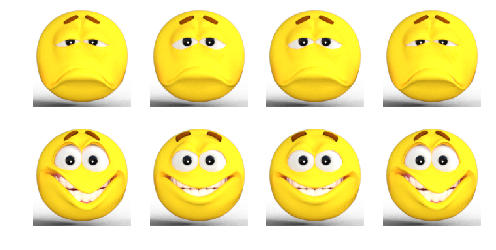

In [61]:
fig = plt.gcf()
fig.set_size_inches(n_rows*4, n_cols)
pic_index = pic_index + 4

train_sad_pix = train_sad_list[pic_index-4:pic_index]
train_happy_pix = train_happy_list[pic_index-4:pic_index]

for i in range(len(train_sad_pix)):
    train_sad_pix[i] = train_sad_dir + train_sad_pix[i]
    train_happy_pix[i] = train_happy_dir + train_happy_pix[i]
    
for i, img in enumerate(train_sad_pix + train_happy_pix):
    sp = plt.subplot(n_rows, n_cols, i+1)
    sp.axis('off')
    img_path = mpimg.imread(img)
    plt.imshow(img_path)

plt.show()

In [78]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu, input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9248)             

In [79]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [80]:
train_datagen = ImageDataGenerator(rescale=(1/255))
train_generator = train_datagen.flow_from_directory(
                './happy-or-sad',
                target_size=(150, 150),
                batch_size=10,
                class_mode='binary')

Found 80 images belonging to 2 classes.


In [81]:
class Mycallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > 0.999):
            print('Stopping training as train accuracy reached {}'. format(logs.get('acc')*100))
            self.model.stop_training = True
            
            
callback = Mycallback()
history = model.fit_generator(
          train_generator,
          steps_per_epoch=2,
          epochs=20,
          callbacks=[callback],
          verbose=1)

Epoch 1/20
2/2 [==============================] - 1s 481ms/step - loss: 3.7543 - acc: 0.5500
Epoch 2/20
2/2 [==============================] - 0s 138ms/step - loss: 0.8583 - acc: 0.7000
Epoch 3/20
2/2 [==============================] - 0s 130ms/step - loss: 0.7255 - acc: 0.5000
Epoch 4/20
2/2 [==============================] - 0s 135ms/step - loss: 0.9888 - acc: 0.6000
Epoch 5/20
2/2 [==============================] - 0s 139ms/step - loss: 0.6283 - acc: 0.6500
Epoch 6/20
2/2 [==============================] - 0s 124ms/step - loss: 0.6897 - acc: 0.7000
Epoch 7/20
2/2 [==============================] - 0s 128ms/step - loss: 0.6835 - acc: 0.7000
Epoch 8/20
2/2 [==============================] - 0s 131ms/step - loss: 0.6839 - acc: 0.4000
Epoch 9/20
2/2 [==============================] - 0s 153ms/step - loss: 0.6604 - acc: 0.5500
Epoch 10/20
2/2 [==============================] - 0s 135ms/step - loss: 0.6381 - acc: 0.5500
Epoch 11/20
2/2 [==============================] - 0s 131ms/step - lo

this is a happy face


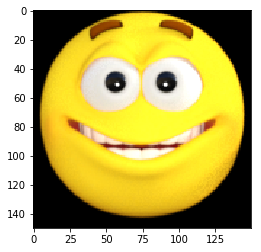

In [85]:
from keras.preprocessing import image
test_image = image.load_img('./happy-or-sad/happy/happy1-10.png', target_size=(150,150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
classes = model.predict(test_image)
plt.imshow(image.load_img('./happy-or-sad/happy/happy1-10.png', target_size=(150,150)))
if classes < 0.5:
    print('this is a happy face')
if classes > 0.5:
    print('this is a sad face')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


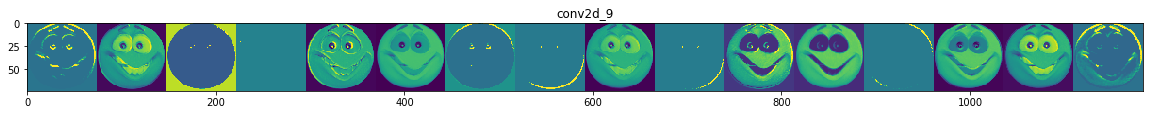

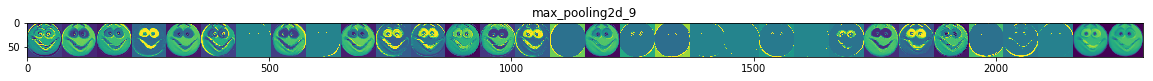

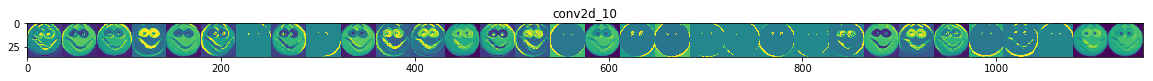

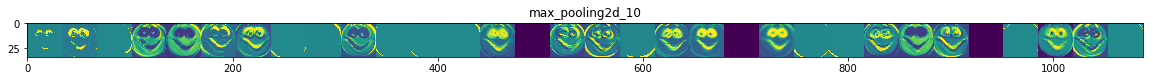

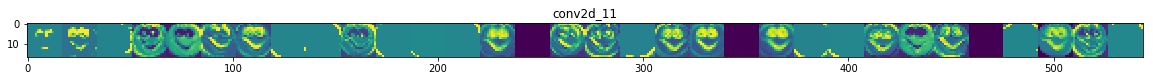

In [92]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
sad_img_files = [os.path.join(train_sad_dir, f) for f in train_sad_list]
happy_img_files = [os.path.join(train_happy_dir, f) for f in train_happy_list]
img_path = random.choice(sad_img_files + happy_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
          # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
          # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')